In [2]:

import scipy.io as sio

import numpy as np

import pandas as pd

from matplotlib.ticker import FuncFormatter

import matplotlib.pyplot as plt

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [3]:
data = sio.loadmat('MSFT_20141112.mat')

In [4]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

In [5]:
midprice = 0.5*(bid[:,0]+ask[:,0])
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
spread = ask[:,0]-bid[:,0]

MIDPRICE

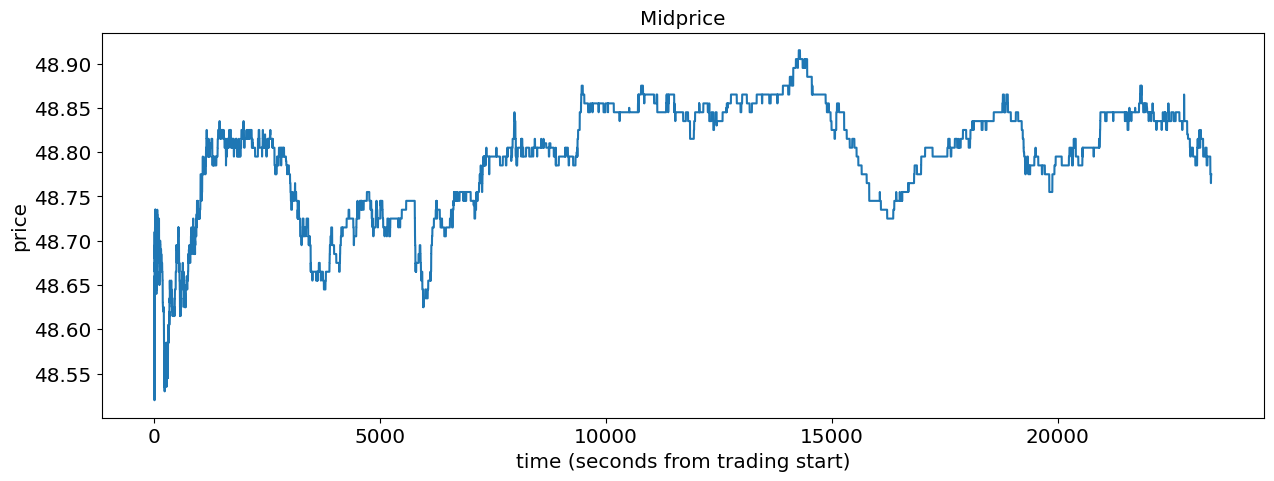

In [6]:
plt.plot(t, midprice)
plt.title('Midprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [7]:
type (midprice)

numpy.ndarray

In [8]:
mid_price = pd.DataFrame(midprice)

In [9]:
mid_price.describe()

,0
count,234000.000000
mean,48.795564
std,0.060571
min,48.520000
25%,48.755000
50%,48.805000
75%,48.845000
max,48.915000


MICROPRICE

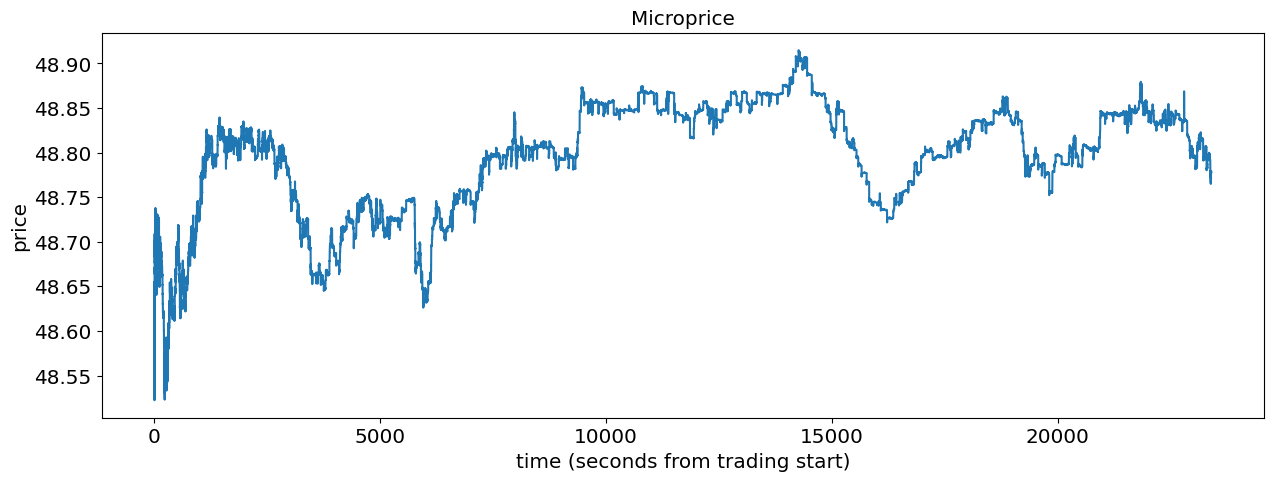

In [10]:
plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

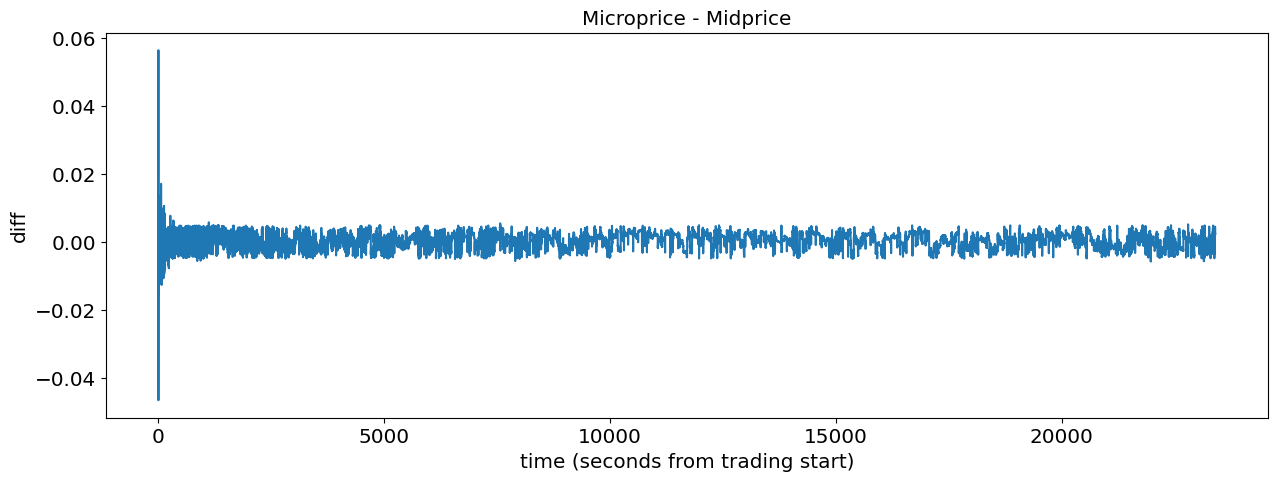

In [11]:
plt.plot(t, microprice-midprice)
plt.title('Microprice - Midprice')
plt.ylabel('diff')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [12]:
micro_price = pd.DataFrame(microprice)

In [13]:
micro_price.describe()

,0
count,234000.000000
mean,48.795932
std,0.060780
min,48.522308
25%,48.756365
50%,48.805317
75%,48.844352
max,48.914776


SPREAD

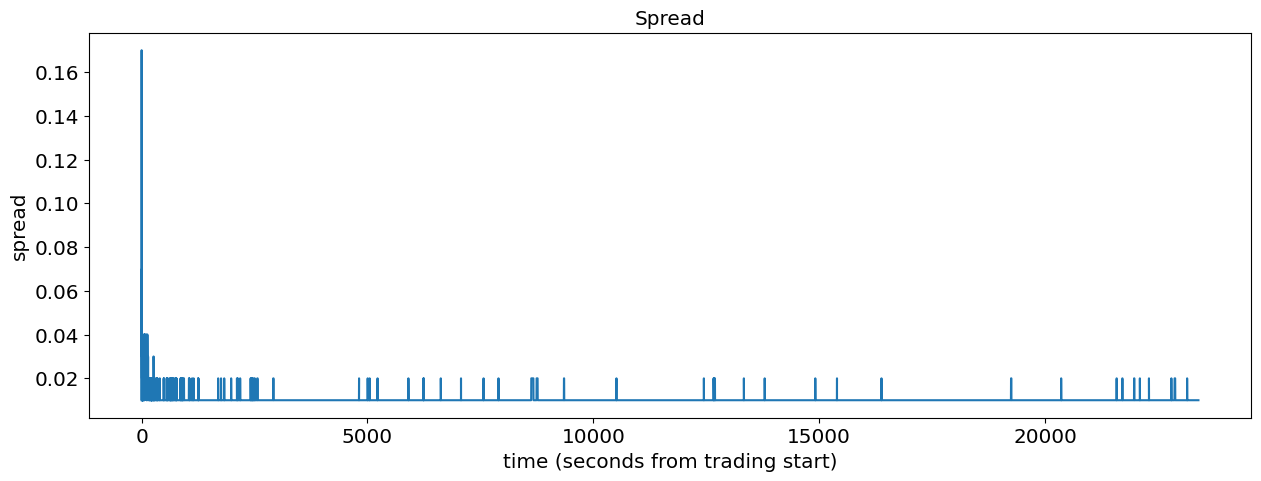

In [14]:
plt.plot(t,spread)
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [15]:
spread_price = pd.DataFrame(spread)

In [16]:
spread_price.describe()

,0
count,234000.000000
mean,0.010194
std,0.001975
min,0.010000
25%,0.010000
50%,0.010000
75%,0.010000
max,0.170000


ORDER IMBALANCE

In [17]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

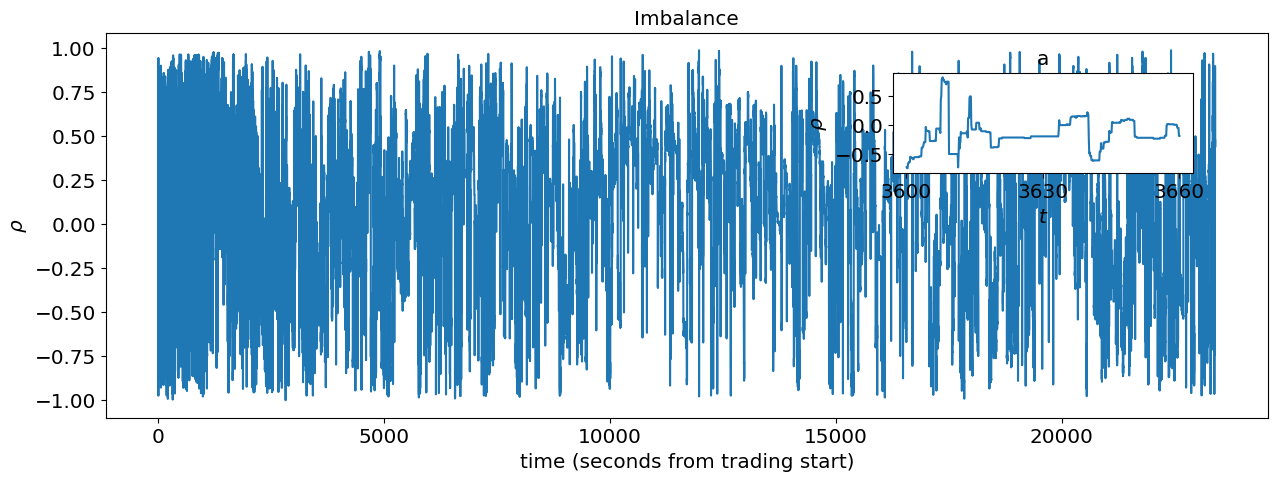

In [18]:
plt.plot(t, rho)
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

In [19]:
Order_imbalance = pd.DataFrame(rho)

In [20]:
Order_imbalance.describe()

,0
count,234000.000000
mean,0.073358
std,0.440735
min,-0.999517
25%,-0.240318
50%,0.130234
75%,0.416229
max,0.985724


CODE FOR TRADING SPEED AND INVENTORY

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# parameters
S0 = 100
R = 10 ** 6 #Initial number of stocks
T = 1; 
k = 3e-3;
b = 4e-3
M = 6 * 3600;    #Number of trading times
alpha = 0.1; 
phi = 0.01;
sigma = 0.30;

In [47]:
gamma = np.sqrt(phi/k);
xi = (alpha - 0.5 * b + np.sqrt(k * phi))/(alpha - 0.5 * b - np.sqrt(k * phi));

In [48]:
tt = np.linspace(0, 1, M + 1)

In [49]:
v = np.zeros((M + 1, 1))
q = np.zeros((M + 1, 1))
v[0] = 0
q[0] = R  
for t in range(1, M + 1): 
    v[t] = gamma * (xi * np.exp(gamma * (T-tt[t-1])) + np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) * q[t-1] * T/M
    q[t] = (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * T) - np.exp(- gamma * T)) * R

Text(0.5, 1.0, 'Trading Speed')

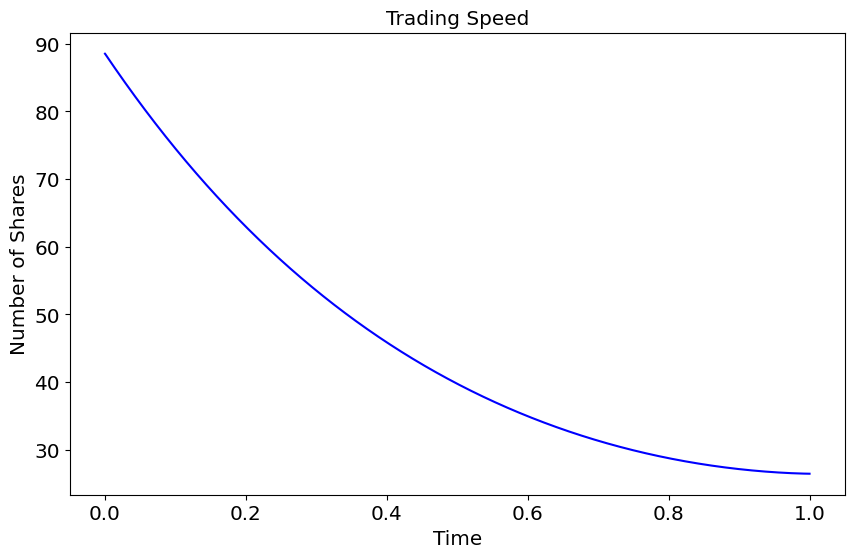

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], v[1:], 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Trading Speed')

Text(0.5, 1.0, 'Inventory')

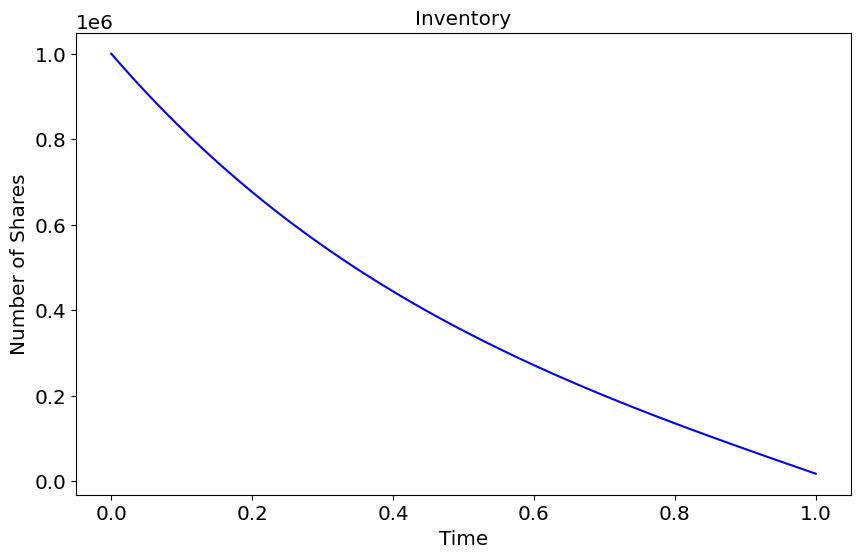

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(tt, q, 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Inventory')